# lab1_3

In [1]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output

In [2]:
sm.init_printing(use_latex='mathjax')
x, y, c = sm.symbols('x, y, c', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u')
ux = u(x)
ux1 = Derivative(u(x), x)
ux2 = Derivative(u(x), (x, 2))

h, uup1, uum1, uu0 = sm.symbols('h, u_i+1, u_i-1, u_i')
uux1 = (uup1 - uum1)/(2*h)
uux2 = (uup1 - 2*uu0 + uum1)/(h**2)

In [3]:
zad1 = {
    'p': 0.0,
    'q': -5.0,
    'f': sm.exp(x),
    'a': 2, 'UA': 0,
    'b': 4, 'UB': 2,
    'E': 0.2
}

## тестовый пример

In [4]:
mainEq = sm.Eq(ux2 + zad1['p']*ux1 + zad1['q']*ux,  zad1['f'])
mainEq

              2           
             d           x
-5.0⋅u(x) + ───(u(x)) = ℯ 
              2           
            dx            

### апроксимированное уравнение

In [5]:
#apro = mainEq.subs({ux: uu0, ux2: uux2, ux1: uux1 })
apro = sm.Eq(uux2 + zad1['p']*uux1 + zad1['q']*uu0,  zad1['f'])
apro

          -2⋅uᵢ + uᵢ₊₁ + uᵢ₋₁    x
-5.0⋅uᵢ + ─────────────────── = ℯ 
                    2             
                   h              

### вычисление шага, переменных и массива абсцисс

In [13]:
count, n = 5, 5
n -= 1

hh = (zad1['b'] - zad1['a']) / n
us = sm.symbols(' '.join([f"u{i}" for i in range(n+1)]))
list_x = [zad1['a'] + hh*i for i in range(n+1)]
display(hh)
display(us)
display(list_x)

0.5

(u₀, u₁, u₂, u₃, u₄)

[2.0, 2.5, 3.0, 3.5, 4.0]

### система

In [14]:
tyts = []
#tyts.append(sm.Eq((-us[2]+4*us[1]-3*us[0])/(2*hh), zad1['UA']))
tyts.append(sm.Eq((us[1]-us[0])/(hh), zad1['UA']))
tyts.extend([apro.subs({x: list_x[i], h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)])
tyts.append(sm.Eq(us[count-1], zad1['UB']))
display(*tyts)

-2.0⋅u₀ + 2.0⋅u₁ = 0

4.0⋅u₀ - 13.0⋅u₁ + 4.0⋅u₂ = 12.1824939607035

4.0⋅u₁ - 13.0⋅u₂ + 4.0⋅u₃ = 20.0855369231877

4.0⋅u₂ - 13.0⋅u₃ + 4.0⋅u₄ = 33.1154519586923

u₄ = 2

In [19]:
def maper(expr):
    if (expr.func == sm.Mul or expr.func == sm.Symbol):
        return [expr]
    return list(expr.args)

def maper2(expr):
    if(isinstance(expr, int) or isinstance(expr, float)):
        return float(expr)
    if (expr.func == sm.Symbol):
        return 1.0
    elif (expr == 0):
        return 0.0
    return float(expr.args[0])

def maper3(express):
    for e in express:
        e.sort(key=comparator)
    for e in express:
        if (len(e) != n+1):
            for i, v in enumerate(e):
                if comparator(v) != i:
                    e.insert(i, 0)
            if (len(e) != n+1):
                e.extend([0]*(n+1-len(e)))

def comparator(expr):
    if (expr.args == () ):
        text = str(expr)
    else:
        text = str(expr.args[1])
    return int(text[1:])

express = list(map(lambda t: maper(t.lhs), tyts))
maper3(express)


#print(express)        

expr_values = list(map(lambda t: list(map(lambda t2: maper2(t2), t)), express))
f_values = list(map(lambda t: float(t.rhs), tyts))
print(tabulate(expr_values, floatfmt=".2f"))
print(f_values)

-----  ------  ------  ------  ----
-2.00    2.00    0.00    0.00  0.00
 4.00  -13.00    4.00    0.00  0.00
 0.00    4.00  -13.00    4.00  0.00
 0.00    0.00    4.00  -13.00  4.00
 0.00    0.00    0.00    0.00  1.00
-----  ------  ------  ------  ----
[0.0, 12.182493960703473, 20.085536923187668, 33.11545195869231, 2.0]


In [61]:
def TDMA(a,b,c,f):
    a, b, c, f = map(lambda k_list: list(map(float, k_list)), (a, b, c, f))
    a[0] = 0
    n = len(f)
    c[n-1] = 0
    alpha = [0]*n
    beta = [0]*n
    x = [0]*n
    u = [0]*n
    
    x[0] = b[0]
    alpha[0] = -c[0]/x[0]
    beta[0] = f[0]/x[0]
    
    for i in range(1,n-1):
        x[i] = b[i] + a[i]*alpha[i-1]
        alpha[i] = -c[i]/x[i]
        beta[i] = (f[i] - a[i]*beta[i-1])/x[i]
    
    x[n-1] = b[n-1] + a[n-1]*alpha[n-2]
    beta[n-1] = (f[n-1] - a[n-1]*beta[n-2])/x[n-1]
    
    u[n-1] = beta[n-1]
    for i in range(n-2,-1,-1):
        u[i] = alpha[i]*u[i+1] + beta[i]
    

    return u

a = [0] + [expr_values[i+1][i] for i in range(n+1-1)]
b = [expr_values[i][i] for i in range(n+1)]
c = [expr_values[i][i+1] for i in range(n+1-1)] + [0]

print(tabulate({'a':a, 'b':b, 'c':c}, headers='keys', showindex="always", tablefmt="github"))
#print(tabulate([a, b, c], headers=['a', 'b', 'c'], showindex="always"))
xxx = TDMA(*[a,b,c], f_values)
display(*xxx)

|    |   a |   b |   c |
|----|-----|-----|-----|
|  0 |   0 |  -2 |   2 |
|  1 |   4 | -13 |   4 |
|  2 |   4 | -13 |   4 |
|  3 |   4 | -13 |   4 |
|  4 |   0 |   1 |   0 |


-2.8316652928421444

-2.8316652928421444

-3.3256234187189575

-2.955226587197549

2.0

вычисление системы

In [17]:
result = sm.solve(tyts, us)
display(*result.items())

(u₀, -2.83166529284215)

(u₁, -2.83166529284215)

(u₂, -3.32562341871896)

(u₃, -2.95522658719755)

(u₄, 2.0)

## основная задача

In [11]:
def solve1(zad, n):
    count = n
    n -= 1
    ## апроксимированное уравнение
    apro = sm.Eq(uux2 + zad['p']*uux1 + zad['q']*uu0,  zad['f'])
    ## определяем шаг
    hh = (zad['b'] - zad['a']) / n
    ## переменные u1-u*
    us = sm.symbols(' '.join([f"u{i}" for i in range(n+1)]))
    ## массив обсцисс
    list_x = [zad['a'] + hh*i for i in range(n+1)]
    
    ## система из n+1 уравнений
    tyts = []
    tyts.append(sm.Eq((us[1]-us[0])/(hh), zad['UA']))
    tyts.extend([apro.subs({x: list_x[i], h: hh, uum1: us[i-1], uu0: us[i], uup1: us[i+1]})  for i in range(1,n)])
    tyts.append(sm.Eq(us[count-1], zad['UB']))
    
    express = list(map(lambda t: maper(t.lhs), tyts))
    maper3(express)
    expr_values = list(map(lambda t: list(map(lambda t2: maper2(t2), t)), express))
    f_values = list(map(lambda t: float(t.rhs), tyts))
    
    a = [0] + [expr_values[i+1][i] for i in range(count-1)]
    b = [expr_values[i][i] for i in range(count)]
    c = [expr_values[i][i+1] for i in range(count-1)] + [0]
    xxx = TDMA(*[a,b,c], f_values)
    
    #result = sm.solve(tyts, us)
    return list_x, xxx #, list(result.values())

### find accuracy

шаг 0.050000


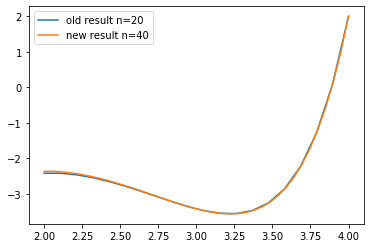

qwerty: q


In [12]:
E = zad1['E']
E_cur = 0
n = 5
result = solve1(zad1, n)
n *= 2
while(True):
    hh = (zad1['b'] - zad1['a']) / n
    plt.plot(*result, label=f"old result n={int(n/2)}")
    result = solve1(zad1, n)
    plt.plot(*result, label=f"new result n={n}" )
    plt.legend(loc='upper left')
    print("шаг %f" % hh)
    plt.show()   
    #display(*solve1(zad1, n))
    if(input("qwerty: ") == 'q'):
        break
    n *= 2
    clear_output()